<h3>I.Importing Package</h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm
from matplotlib import pyplot
import matplotlib.cm as cm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

 


<h3>II-l'importation des donnees :</h3> 

In [3]:
mat = pd.read_csv(r"D:\PFE_PROJECT\artifacts\student-mat.csv", sep=';')
por = pd.read_csv(r"D:\PFE_PROJECT\artifacts\student-por.csv" , sep=';')


 I.1-concatination des donnees 

In [4]:
df = pd.concat([mat,por])
df


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


<h3> II-LA COMPREHENSION DES DONNES : </h3>

II.1-check the distribution of data 

In [5]:
#check the distribution of numerical variables :
print("les statistiques descriptives des variables numeriques : \n")
df.describe()

les statistiques descriptives des variables numeriques : 



,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


information : std presque dans tout les variables est tres faible ce qui montre que les donnees sont coherantes sont centre autour de la moyenne 

In [6]:
#check the distribution of categorical data :
print("la distribution des donnees des variables de types object : ")
df.describe(include=[object])

la distribution des donnees des variables de types object : 


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,772,591,759,738,923,399,584,430,728,925,640,824,528,835,955,827,673


information : la plupart des variables categorielle ce sont des variables a deux valeures "binaire"

II.3 verifier le nombre de valeurs unique de chaque variable : 

In [7]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      35
G1            18
G2            17
G3            19
dtype: int64

II.4 breve resumer sur les donnees (dataType / le nombre de valeurs non manqunats )

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher      10

<h3>II.5 verifier la qualites des donnees :</h3>
  

II.5.1 verifier les  valeurs redondantes :

In [9]:
df.duplicated().sum()

0

pas de valeurs redondantes 

II.5.2 verifier la presance des  valeurs maquants : 

In [10]:
#df.replace('?',np.nan,inplace=True)
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

II.5.3 verifier le type des variables 

In [11]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

II.5.4 verrifier la presance des valeures aburrantes :

<Axes: xlabel='G3'>

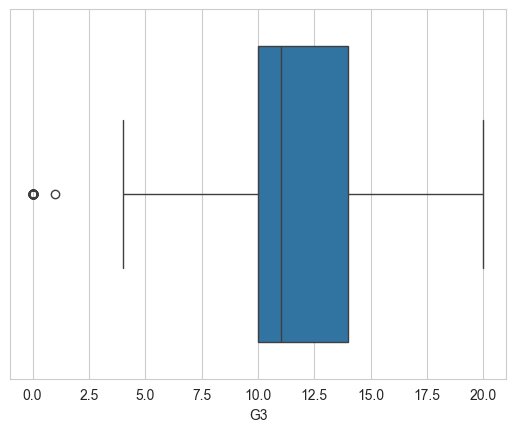

In [12]:
sns.boxplot(x=df['G3'])

<Axes: xlabel='absences'>

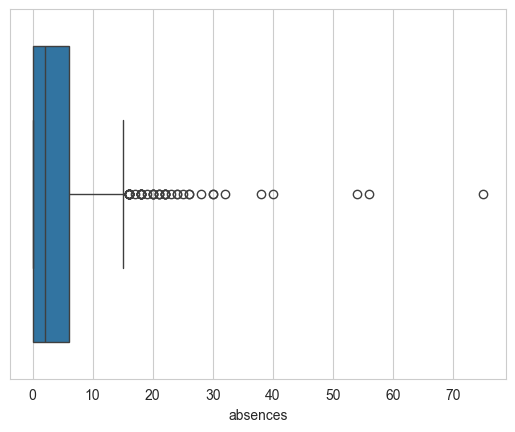

In [13]:
sns.boxplot(x=df['absences'])

In [14]:
upper_limit = df['absences'].quantile(.95)
df_outliers=df[df['absences']>upper_limit]
df_outliers

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
40,GP,F,16,U,LE3,T,2,2,other,other,...,3,3,3,1,2,3,25,7,10,11
74,GP,F,16,U,GT3,T,3,3,other,services,...,4,3,3,2,4,5,54,11,12,11
89,GP,M,16,U,LE3,A,4,4,teacher,health,...,4,1,3,3,5,5,18,8,6,7
103,GP,F,15,U,GT3,T,3,2,services,other,...,4,3,5,1,1,2,26,7,6,6
118,GP,M,17,R,GT3,T,1,3,other,other,...,5,2,4,1,4,5,20,9,7,8
123,GP,M,16,U,GT3,T,4,4,health,other,...,3,4,4,1,4,5,18,14,11,13
183,GP,F,17,U,LE3,T,3,3,other,other,...,5,3,3,2,3,1,56,9,9,8
198,GP,F,17,U,GT3,T,4,4,services,teacher,...,4,2,4,2,3,2,24,18,18,18
203,GP,F,17,R,GT3,T,2,2,other,other,...,5,3,2,1,2,3,18,7,6,6
205,GP,F,17,U,GT3,T,3,4,at_home,services,...,4,4,3,3,4,5,28,10,9,9


In [15]:
outliers=[]
def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    
    return outliers


In [16]:
print(detect_outliers(df['absences']))

[25, 54, 26, 56, 24, 28, 75, 30, 38, 40, 24, 32, 30, 26]


</h3>III-DATA PREPROCESSING</h3>

III.1 COLUMN RENAME :

In [17]:
headers = ["School","Sex","Age","Home_Address_Type","Family_Size","Parents_Cohabitation_Status","Mother_Eductaion","Father_Education","Mother_Job","Father_Job","Reason_Choosing_School","Guardien","Travel_Time","Revision_Time","Past_Class_Failures","Extra_Eductional_Support",
           "Family_Educational_Support","Extra_Paid_Classes","Extra_Activities","Attended_Nursery","Wants_Higher_Education","Internet_Access","Romantic_Relationship","Quality_Family_Relationship","Free_Time","Go_out","Day_Drugs_Consumption","Week_Drugs_Consumption","Health_Status",
           "Abscence","First_Periode_Grade","Seconde_Periode_Grade","Final_Periode_Grade"]
df.columns = headers

In [18]:
df.head()

,School,Sex,Age,Home_Address_Type,Family_Size,Parents_Cohabitation_Status,Mother_Eductaion,Father_Education,Mother_Job,Father_Job,...,Quality_Family_Relationship,Free_Time,Go_out,Day_Drugs_Consumption,Week_Drugs_Consumption,Health_Status,Abscence,First_Periode_Grade,Seconde_Periode_Grade,Final_Periode_Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


III.1 Netoyer les valeures aburrantes :

<h3> III.2 la transformation des donnees :</h3>

III.2.1 data binning (reduction de la numerosite):

la creation de la colonne moyenne generale:

In [19]:
df["General_Average"]  = (df["First_Periode_Grade"]+df["Seconde_Periode_Grade"]+df["Final_Periode_Grade"])/3
df.head()

,School,Sex,Age,Home_Address_Type,Family_Size,Parents_Cohabitation_Status,Mother_Eductaion,Father_Education,Mother_Job,Father_Job,...,Free_Time,Go_out,Day_Drugs_Consumption,Week_Drugs_Consumption,Health_Status,Abscence,First_Periode_Grade,Seconde_Periode_Grade,Final_Periode_Grade,General_Average
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.666667


creation de la colonne réussir :

In [20]:
# Création de la colonne "réussir" si la note générale dépasse 10
df["réussir"] = df["General_Average"].apply(lambda x: "Yes" if x >= 10 else "No")

df.head()

,School,Sex,Age,Home_Address_Type,Family_Size,Parents_Cohabitation_Status,Mother_Eductaion,Father_Education,Mother_Job,Father_Job,...,Go_out,Day_Drugs_Consumption,Week_Drugs_Consumption,Health_Status,Abscence,First_Periode_Grade,Seconde_Periode_Grade,Final_Periode_Grade,General_Average,réussir
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,5.666667,No
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5.333333,No
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,8.333333,No
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,14.666667,Yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,8.666667,No


la creation de la column "Final_grade" = ['Low', 'Medium', 'High']

In [21]:
#criee un tableau des limites:
valeur_limit=[0,9,14,20]
bins = np.array(valeur_limit)
#preciser les nomes des groupes :
group_names = ['Low', 'Medium', 'High']

df['Final_grade'] = pd.cut(df['General_Average'], bins, labels=group_names, include_lowest=True )
df[['General_Average','Final_grade']].head(20)


,General_Average,Final_grade
0,5.666667,Low
1,5.333333,Low
2,8.333333,Low
3,14.666667,High
4,8.666667,Low
5,15.000000,High
6,11.666667,Medium
7,5.666667,Low
8,17.666667,High
9,14.666667,High


Final Grade Distribution using a diagramme en barre:

Text(0.5, 1.0, 'students number by final grade')

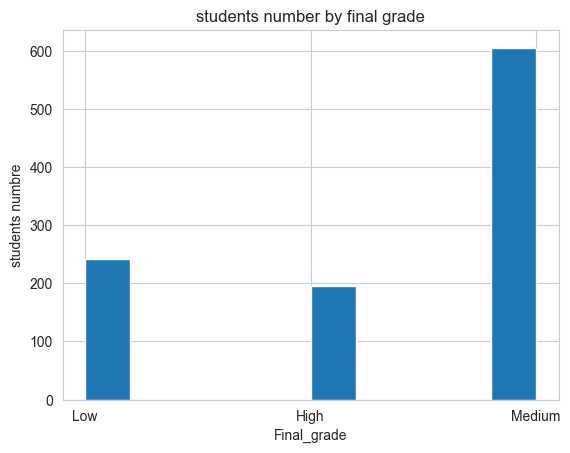

In [22]:

# Final Grade Countplot
plt.hist(df["Final_grade"])

# set x/y labels and plot title
plt.xlabel("Final_grade")
plt.ylabel("students numbre")
plt.title("students number by final grade")

la creation de la column "Binned_Revision_Time":

In [23]:
#criee un tableau des limites:
valeur_limit=[0,1,2,3,4]
bins = np.array(valeur_limit)
#preciser les nomes des groupes :
group_names = ['short_time', 'Medium_time', 'long_time','very_long_time']

df['Binned_Revision_Time'] = pd.cut(df['Revision_Time'], bins, labels=group_names, include_lowest=True )
df[['Revision_Time','Binned_Revision_Time']].head(100)
    

,Revision_Time,Binned_Revision_Time
0,2,Medium_time
1,2,Medium_time
2,2,Medium_time
3,3,long_time
4,2,Medium_time
...,...,...
95,4,very_long_time
96,1,short_time
97,2,Medium_time
98,1,short_time


(array([503.,   0.,   0., 162.,   0.,   0., 317.,   0.,   0.,  62.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

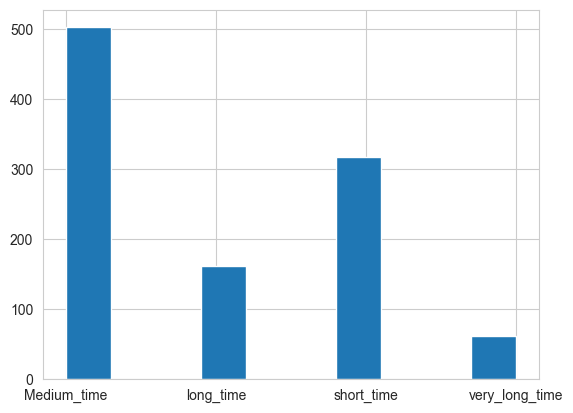

In [24]:
plt.hist(df[["Binned_Revision_Time"]])

<h3>IIII-analyse exploratoire des donnees (EDA)</h3> Question Major :"quelle sont les variables les plus influences sur la performance des etudiants"

IIII-1 voir la correlation entre les variables :

In [25]:
#convert data type categorie to object 
df["Final_grade"] = df["Final_grade"].astype(object)
df["Binned_Revision_Time"] = df["Binned_Revision_Time"].astype(object)
df.head()

,School,Sex,Age,Home_Address_Type,Family_Size,Parents_Cohabitation_Status,Mother_Eductaion,Father_Education,Mother_Job,Father_Job,...,Week_Drugs_Consumption,Health_Status,Abscence,First_Periode_Grade,Seconde_Periode_Grade,Final_Periode_Grade,General_Average,réussir,Final_grade,Binned_Revision_Time
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,6,5,6,6,5.666667,No,Low,Medium_time
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,4,5,5,6,5.333333,No,Low,Medium_time
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,10,7,8,10,8.333333,No,Low,Medium_time
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,2,15,14,15,14.666667,Yes,High,long_time
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,4,6,10,10,8.666667,No,Low,Medium_time


In [26]:
#s'eparer les column selon son type :
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 17 numerical features : ['Age', 'Mother_Eductaion', 'Father_Education', 'Travel_Time', 'Revision_Time', 'Past_Class_Failures', 'Quality_Family_Relationship', 'Free_Time', 'Go_out', 'Day_Drugs_Consumption', 'Week_Drugs_Consumption', 'Health_Status', 'Abscence', 'First_Periode_Grade', 'Seconde_Periode_Grade', 'Final_Periode_Grade', 'General_Average']

We have 20 categorical features : ['School', 'Sex', 'Home_Address_Type', 'Family_Size', 'Parents_Cohabitation_Status', 'Mother_Job', 'Father_Job', 'Reason_Choosing_School', 'Guardien', 'Extra_Eductional_Support', 'Family_Educational_Support', 'Extra_Paid_Classes', 'Extra_Activities', 'Attended_Nursery', 'Wants_Higher_Education', 'Internet_Access', 'Romantic_Relationship', 'réussir', 'Final_grade', 'Binned_Revision_Time']


convertir les donnees de type object en donnees numeric : 

In [27]:
# mapping strings to numeric values:
df_numerical = df.copy()
def numerical_data(df_numerical):
    df_numerical.replace({
        'School': {'GP': 0, 'MS': 1},
        'Sex': {'M': 0, 'F': 1},
        'Home_Address_Type': {'U': 0, 'R': 1},
        'Family_Size': {'LE3': 0, 'GT3': 1},
        'Parents_Cohabitation_Status': {'A': 1, 'T': 0},
        'Mother_Job': {'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4},
        'Father_Job': {'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4},
        'Reason_Choosing_School': {'home': 0, 'reputation': 1, 'course': 2, 'other': 3},
        'Guardien': {'mother': 0, 'father': 1, 'other': 2},
        'Extra_Eductional_Support': {'no': 0, 'yes': 1},
        'Family_Educational_Support': {'no': 0, 'yes': 1},
        'Extra_Paid_Classes': {'no': 0, 'yes': 1},
        'Extra_Activities': {'no': 0, 'yes': 1},
        'Attended_Nursery': {'no': 0, 'yes': 1},
        'Wants_Higher_Education': {'no': 0, 'yes': 1},
        'Internet_Access': {'no': 0, 'yes': 1},
        'Romantic_Relationship': {'no': 0, 'yes': 1},
        'Final_grade':{'Low':0,'Medium':1,'High':2},
        'Binned_Revision_Time':{'short_time':0,'Medium_time':1,'long_time':2,'very_long_time':3},
        'réussir': {'No': 0, 'Yes': 1}
        
    }, inplace=True)

numerical_data(df_numerical)
df_numerical.head()

,School,Sex,Age,Home_Address_Type,Family_Size,Parents_Cohabitation_Status,Mother_Eductaion,Father_Education,Mother_Job,Father_Job,...,Week_Drugs_Consumption,Health_Status,Abscence,First_Periode_Grade,Seconde_Periode_Grade,Final_Periode_Grade,General_Average,réussir,Final_grade,Binned_Revision_Time
0,0,1,18,0,1,1,4,4,3,0,...,1,3,6,5,6,6,5.666667,0,0,1
1,0,1,17,0,1,0,1,1,3,4,...,1,3,4,5,5,6,5.333333,0,0,1
2,0,1,15,0,0,0,1,1,3,4,...,3,3,10,7,8,10,8.333333,0,0,1
3,0,1,15,0,1,0,4,2,1,2,...,1,5,2,15,14,15,14.666667,1,2,2
4,0,1,16,0,1,0,3,3,4,4,...,2,5,4,6,10,10,8.666667,0,0,1


 ### Correlation heatmap

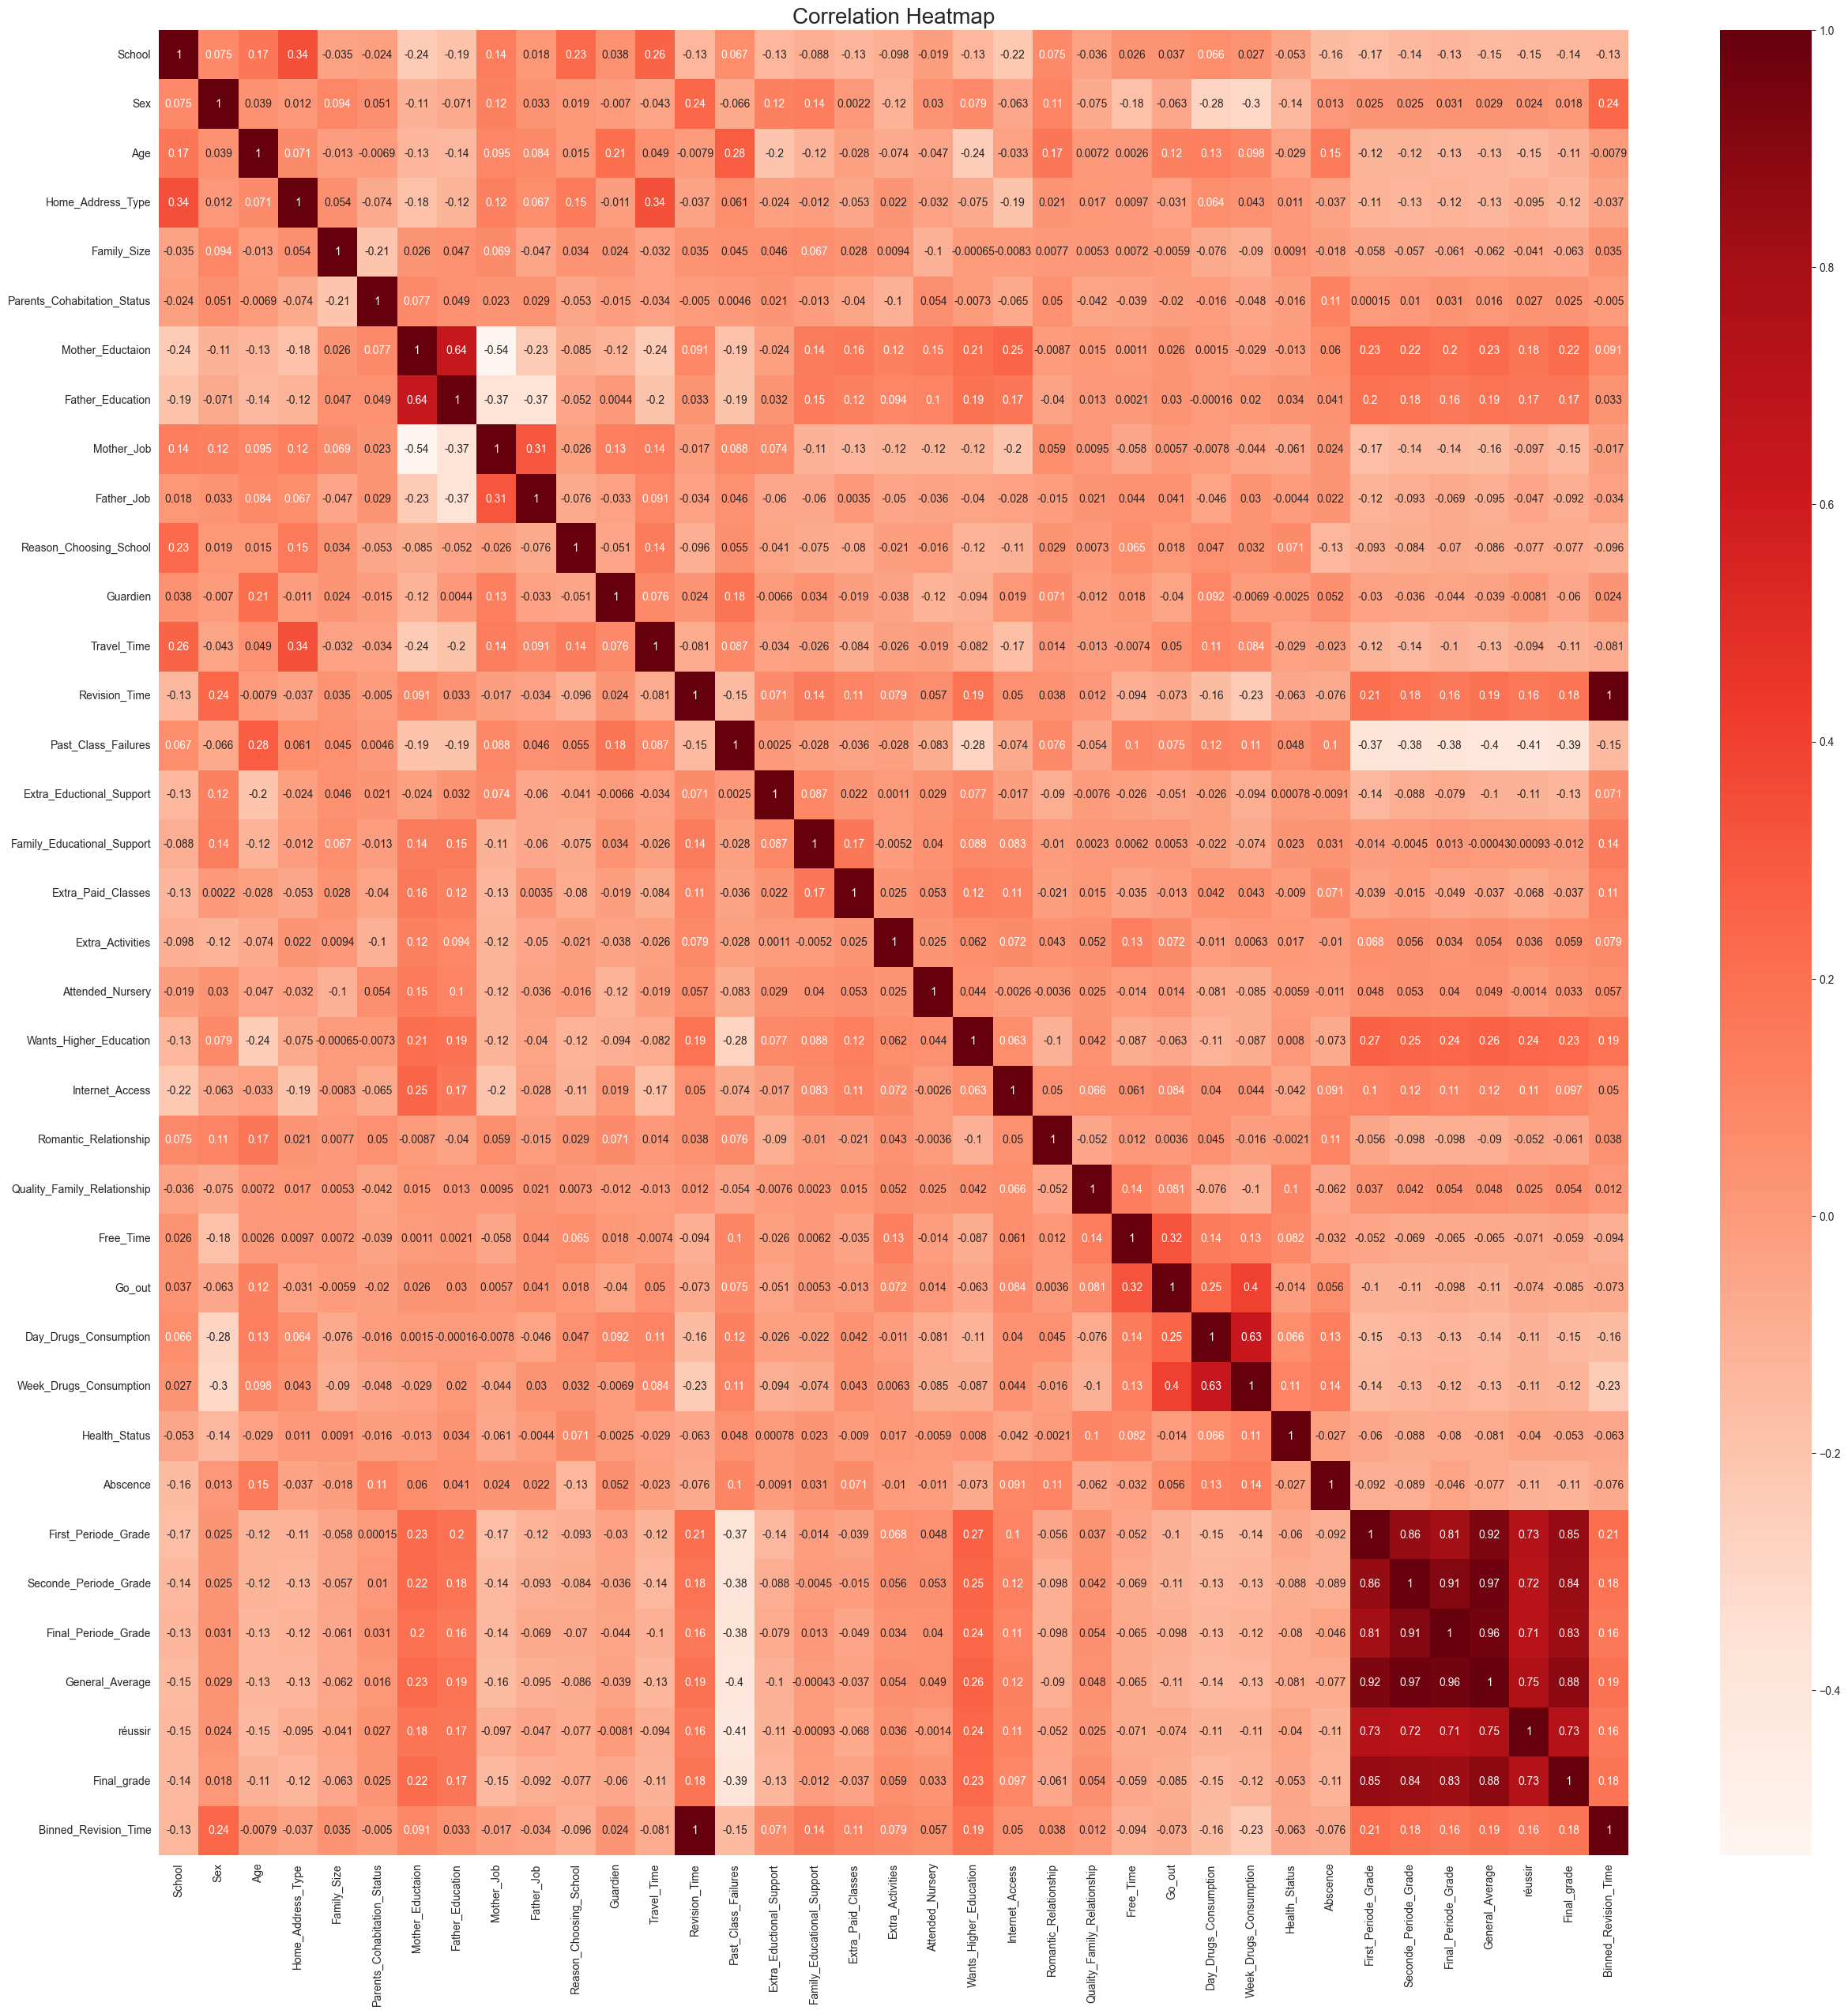

In [28]:
corr = df_numerical.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

### correlation between student status and other features

Text(0.5, 1.0, 'Features Correlating with the status of student')

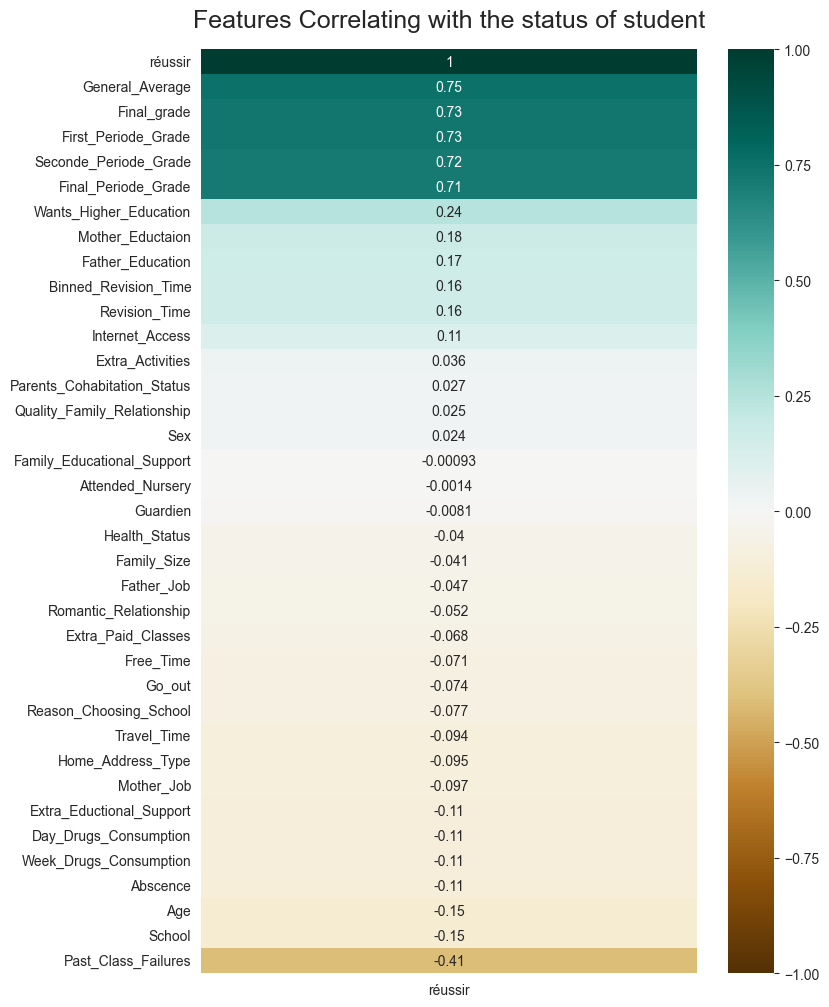

In [29]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_numerical.corr()[['réussir']].sort_values(by='réussir', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the status of student', fontdict={'fontsize':18}, pad=16)

insights : **(Mother_Education,Revision_Time,Father_education,wants_higher_edication) son les variables ayant une correlation positive importante par rapport aux autres variables
   en revanche ** (Age,Past_Class_failures,Day/week_Drugs_Consumption,Abscence) ont une correlation negative sur final_periode_grade 

<h5 style = 'color:yellow'>yeep maintenant on'est arriver a notre objective :</h5> 
<h4 style ='color:red'> Mother_Education,Revision_Time,Father_education,wants_higher_edication,Age,Past_Class_failures,week_Drugs_Consumption,Abscence </h4>
<h5 style = 'color:yellow'> alors on peut faire notre selection pour les donnees a utiliser en modelisation </h5>

#### voir la distribution des  categories de chaque variable categorielle a utiliser dans la modelisation 

Text(0.5, 1.0, 'the distribution of grades between the differents Mother_education_categories')

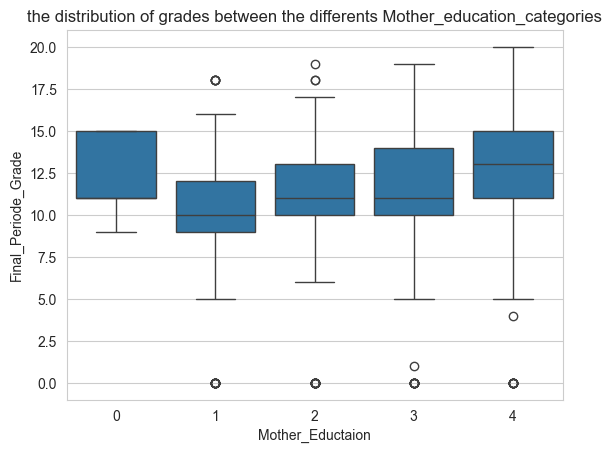

In [30]:
sns.boxplot(x="Mother_Eductaion", y="Final_Periode_Grade", data=df)
plt.title("the distribution of grades between the differents Mother_education_categories")

Text(0.5, 1.0, 'the distribution of grades between the differents Family_Size')

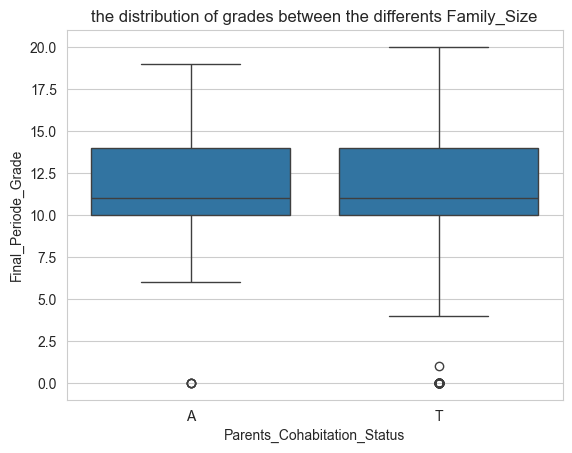

In [31]:
sns.boxplot(x="Parents_Cohabitation_Status", y="Final_Periode_Grade", data=df)
plt.title("the distribution of grades between the differents Family_Size")

Text(0.5, 1.0, 'the distribution of grades between the differents Extra_Activities')

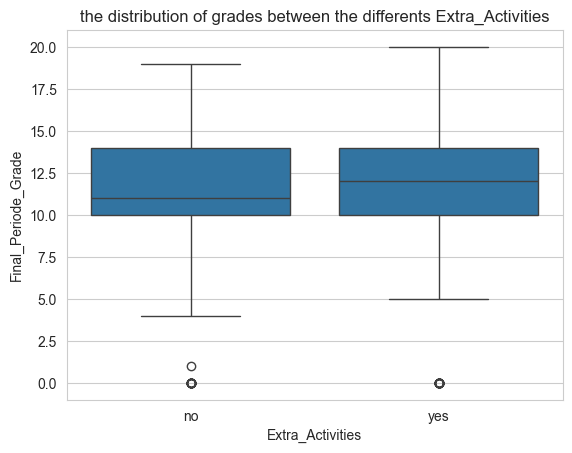

In [32]:
sns.boxplot(x="Extra_Activities", y="Final_Periode_Grade", data=df)
plt.title("the distribution of grades between the differents Extra_Activities")

Text(0.5, 1.0, 'the distribution of grades between the differents Revision_Time_categories')

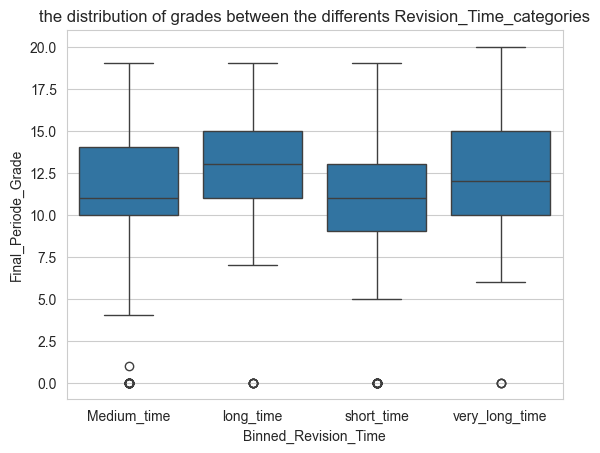

In [33]:
sns.boxplot(x="Binned_Revision_Time", y="Final_Periode_Grade", data=df)
plt.title("the distribution of grades between the differents Revision_Time_categories")

Text(0.5, 1.0, 'the distribution of grades between the differents Gradien_categorie')

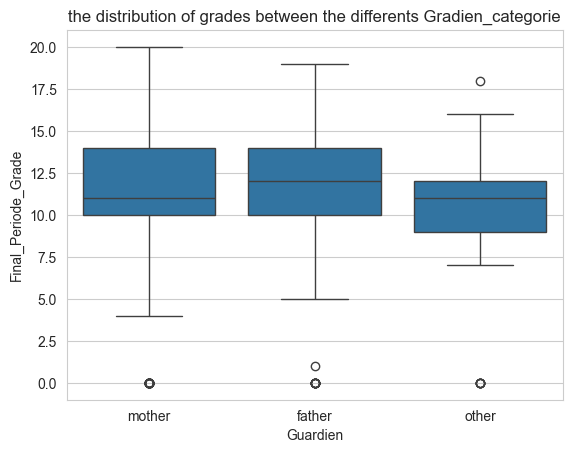

In [34]:
sns.boxplot(x="Guardien", y="Final_Periode_Grade", data=df)
plt.title("the distribution of grades between the differents Gradien_categorie")


insight:pas d'une grande destinction entre les categories c'est pas utile d'utiliser Guardian comme une variable independantes pour faire la prediction 

Text(0.5, 1.0, 'the distribution of grades between the differents pastClassFailure_categories')

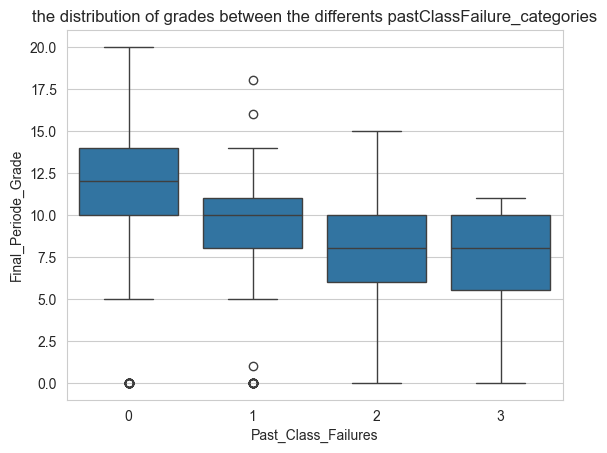

In [35]:
sns.boxplot(x="Past_Class_Failures", y="Final_Periode_Grade", data=df)
plt.title("the distribution of grades between the differents pastClassFailure_categories")

insight : on peut utiliser le nombre de classe dans less quelle vous etes échouee comme un predicteur 

#### data vizualization :
aller chercher quelque graphes visuels pour retourner des conaissance dans notre data set:  

In [36]:
#plot of student status
df_numerical['réussir'].value_counts()

réussir
1    723
0    321
Name: count, dtype: int64

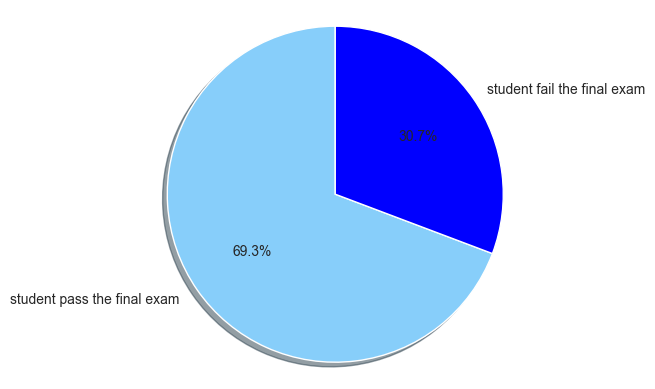

In [37]:
labels = 'student pass the final exam ', 'student fail the final exam'
sizes = [723, 321]
colors=['lightskyblue','blue']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

la plupart des etudiant sont reussient leur examens d'une proportion de 69.3%

#### a) student status by go out 

In [39]:
df_numerical["Go_out"].unique()

array([4, 3, 2, 1, 5], dtype=int64)

[Text(0, 0, 'Non réussi'), Text(1, 0, 'Réussi')]

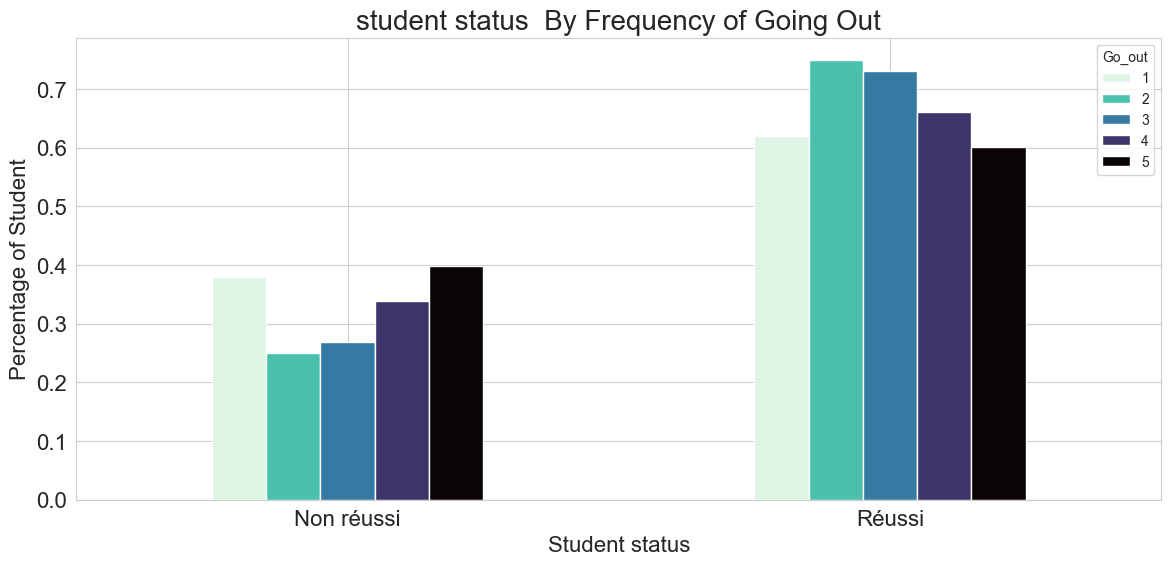

In [40]:
# going out
perc = (lambda col: col/col.sum())
index = [0,1]
out_tab = pd.crosstab(index=df_numerical.réussir,columns=df_numerical.Go_out)
out_perc = out_tab.apply(perc).reindex(index)
out_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.title('student status  By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Student status', fontsize=16)
plt.gca().set_xticklabels(['Non réussi', 'Réussi'], rotation=0)

# going out with friends (numeric: from 1 - very low to 5 - very high)

c1 : la majorite des etudiant qui n'ont pas reussie l'examen ont une valeurs go_out eleve:5 . c_a_d ils sortent beaucoup 
 en revanche la pluapart des etudiant ayant reussie l'exament on une valeurs go_out faible :2   

### b)Student status by romantic relation:

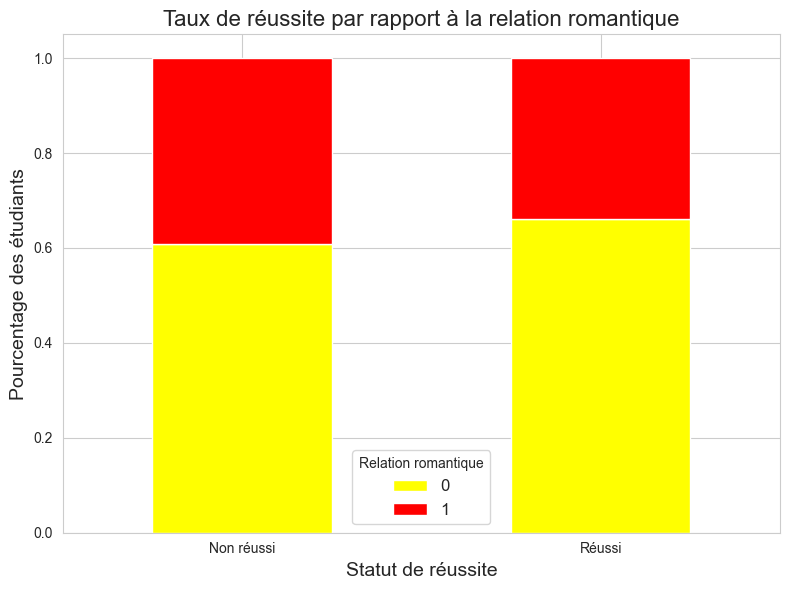

In [41]:
# romantic status

# Calcul du taux de réussite par rapport à la relation romantique
romance_tab = pd.crosstab(index=df_numerical['réussir'], columns=df_numerical['Romantic_Relationship'], normalize='index')

# Tracé du diagramme à barres
fig, ax = plt.subplots(figsize=(8, 6))

# Définition des couleurs pour les barres
colors = ['yellow', 'red']

# Tracé des barres
romance_tab.plot(kind='bar', stacked=True, color=colors, ax=ax)

# Personnalisation de l'axe des x et de l'axe des y
plt.xlabel('Statut de réussite', fontsize=14)
plt.ylabel('Pourcentage des étudiants', fontsize=14)
plt.title('Taux de réussite par rapport à la relation romantique', fontsize=16)

# Modification des étiquettes de l'axe x
ax.set_xticklabels(['Non réussi', 'Réussi'], rotation=0)

# Affichage de la légende
plt.legend(title='Relation romantique', fontsize=12)

# Affichage du graphique
plt.tight_layout()
plt.show()

# 0 in romantic mean no romantic relation

c2: les etudiant Non reussi ont un pourcentage des etudiant en realtion_romantic plus grand que les etudiant reussie 

#### c) Student status by  mother job and mother education:

C:\Users\PC\AppData\Local\Temp\ipykernel_21212\2760392770.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  figure = sns.countplot(x='Mother_Job', data=df, order=['teacher', 'health', 'services', 'at_home', 'other'], palette=palette_colors)


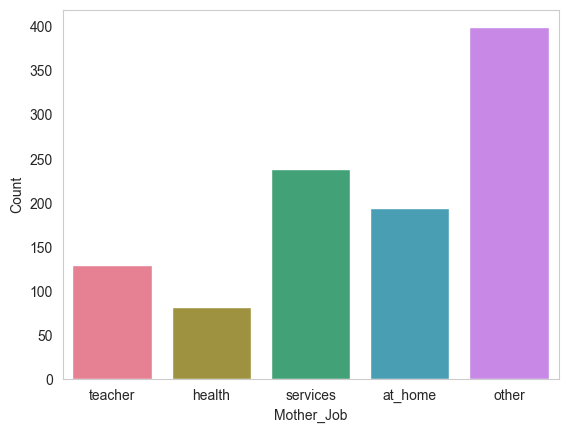

In [42]:
# 1) mother job 
# Mjob distribution

# Définition de la palette de couleurs pour chaque emploi de la mère
palette_colors = sns.color_palette("husl", 5)

# Tracé du countplot
f, fx = plt.subplots()
figure = sns.countplot(x='Mother_Job', data=df, order=['teacher', 'health', 'services', 'at_home', 'other'], palette=palette_colors)
fx = fx.set(ylabel="Count", xlabel="Mother_Job")

# Désactivation des lignes de grille
figure.grid(False)

plt.show()


<Figure size 640x480 with 0 Axes>

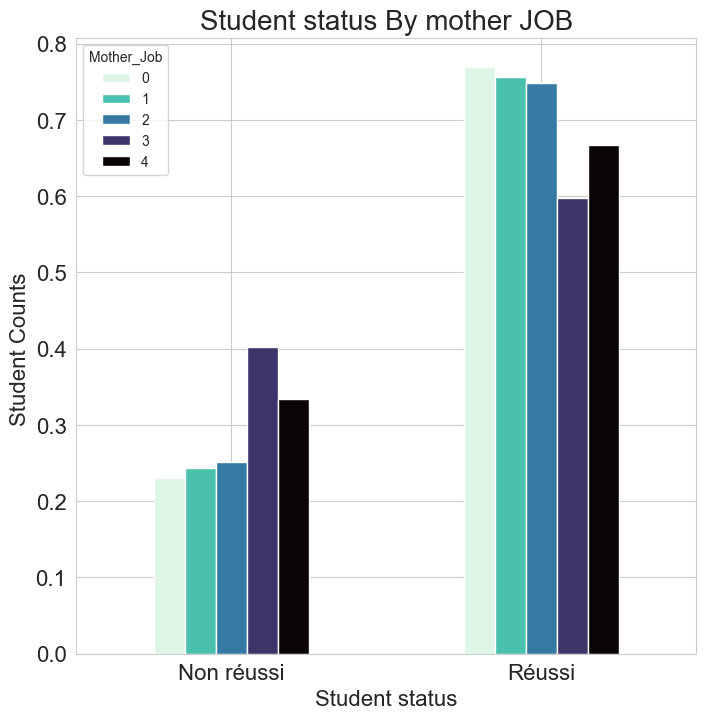

In [43]:
mjob_tab1 = pd.crosstab(index=df_numerical['réussir'], columns=df_numerical['Mother_Job'])
mjob_perc = mjob_tab1.apply(perc).reindex(index)
plt.figure()
mjob_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(8,8))
plt.title('Student status By mother JOB', fontsize=20)
plt.ylabel('Student Counts ', fontsize=16)
plt.xlabel('Student status', fontsize=16)
plt.gca().set_xticklabels(['Non réussi', 'Réussi'], rotation=0)
plt.show()

#'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4

c3:les etudaiant ayant des Mamans qui enseigne ont un good student status en revanche le mamans qui reste a la maison 

C:\Users\PC\AppData\Local\Temp\ipykernel_21212\3071137426.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good.rename(columns={'Mother_Eductaion': 'good_student_mother_education'}, inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_21212\3071137426.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poor.rename(columns={'Mother_Eductaion': 'poor_student_mother_education'}, inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_21212\3071137426.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.k

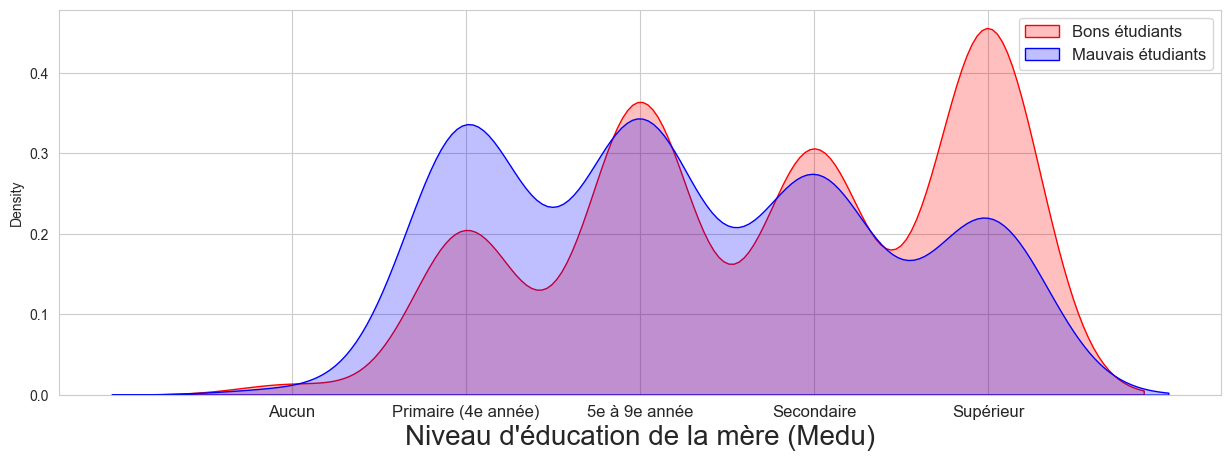

In [44]:
# Filtrer les données pour les étudiants réussis et non réussis
good = df_numerical.loc[df_numerical['réussir'] == 1]
poor = df_numerical.loc[df_numerical['réussir'] == 0]

# Renommer les colonnes pour plus de clarté
good.rename(columns={'Mother_Eductaion': 'good_student_mother_education'}, inplace=True)
poor.rename(columns={'Mother_Eductaion': 'poor_student_mother_education'}, inplace=True)
# Tracé du graphique KDE
plt.figure(figsize=(15,5))
sns.kdeplot(good['good_student_mother_education'], shade=True, color="r", label="Bons étudiants")
sns.kdeplot(poor['poor_student_mother_education'], shade=True, color="b", label="Mauvais étudiants")
plt.xlabel("Niveau d'éducation de la mère (Medu)", fontsize=20)

# Définir les étiquettes sur l'axe x
plt.gca().set_xticks(range(5))
plt.gca().set_xticklabels(['Aucun', 'Primaire (4e année)', '5e à 9e année', 'Secondaire', 'Supérieur'], fontsize=12)

# Afficher la légende
plt.legend(fontsize=12)
plt.show()


c4: si le niveau d'education de la mere est eleve cela sera impacter leurs enfants dans son reussite scolaire 

#### what is the more impuctfull Mother education or father eeducation ??

C:\Users\PC\AppData\Local\Temp\ipykernel_21212\1468037559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good.rename(columns={'Father_Education': 'good_student_father_education'}, inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_21212\1468037559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poor.rename(columns={'Father_Education': 'poor_student_father_education'}, inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_21212\1468037559.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.k

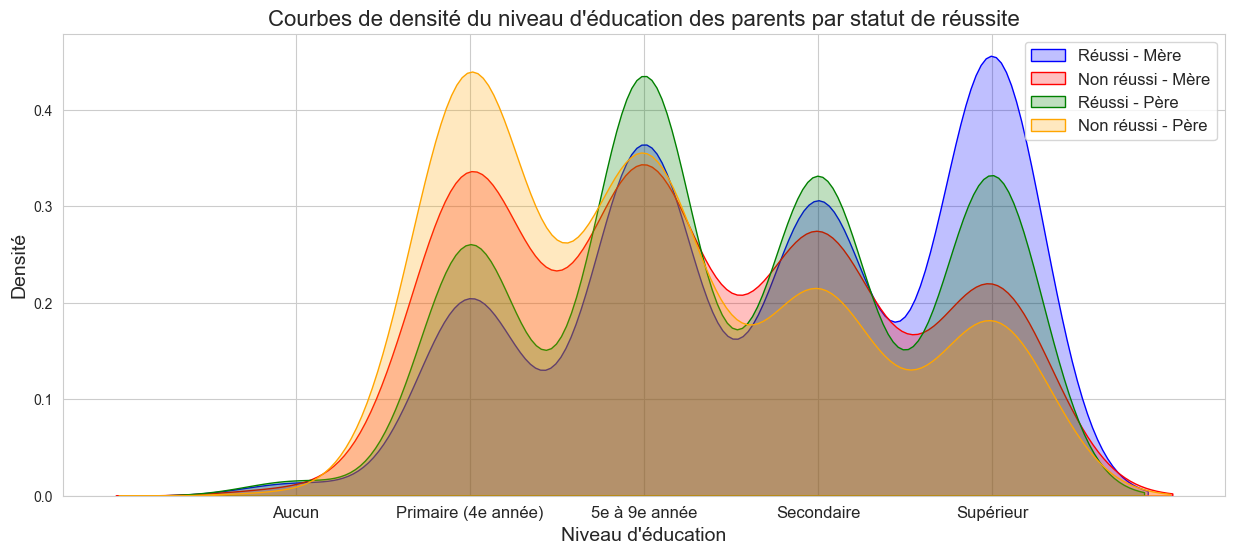

In [45]:

good.rename(columns={'Father_Education': 'good_student_father_education'}, inplace=True)
poor.rename(columns={'Father_Education': 'poor_student_father_education'}, inplace=True)

# Création d'un sous-ensemble de données pour chaque groupe (réussi et non réussi)
good_mother_education = good['good_student_mother_education']
poor_mother_education = poor['poor_student_mother_education']
good_father_education = good['good_student_father_education']
poor_father_education = poor['poor_student_father_education']

# Tracé des courbes de densité pour le niveau d'éducation de la mère
plt.figure(figsize=(15, 6))
sns.kdeplot(good_mother_education, color='blue', label='Réussi - Mère', shade=True)
sns.kdeplot(poor_mother_education, color='red', label='Non réussi - Mère', shade=True)

# Tracé des courbes de densité pour le niveau d'éducation du père
sns.kdeplot(good_father_education, color='green', label='Réussi - Père', shade=True)
sns.kdeplot(poor_father_education, color='orange', label='Non réussi - Père', shade=True)

# Ajout de légendes et de labels
plt.title('Courbes de densité du niveau d\'éducation des parents par statut de réussite', fontsize=16)
plt.xlabel('Niveau d\'éducation', fontsize=14)
# Définir les étiquettes sur l'axe x
plt.gca().set_xticks(range(5))
plt.gca().set_xticklabels(['Aucun', 'Primaire (4e année)', '5e à 9e année', 'Secondaire', 'Supérieur'], fontsize=12)

plt.ylabel('Densité', fontsize=14)
plt.legend(fontsize=12)
plt.show()


c5 : le niveau d'education de la mere et plus influence sur les etudiants que le niveau d'education de pere , alors si vous etes une fille essayer d'etudier bien cela vous n'influencer pas seulement mais aussi votre enfants , si vou etes un homme chercher une femme qui a un niveau d'education bonne

#### E) Student status by deseire to take heigher education:

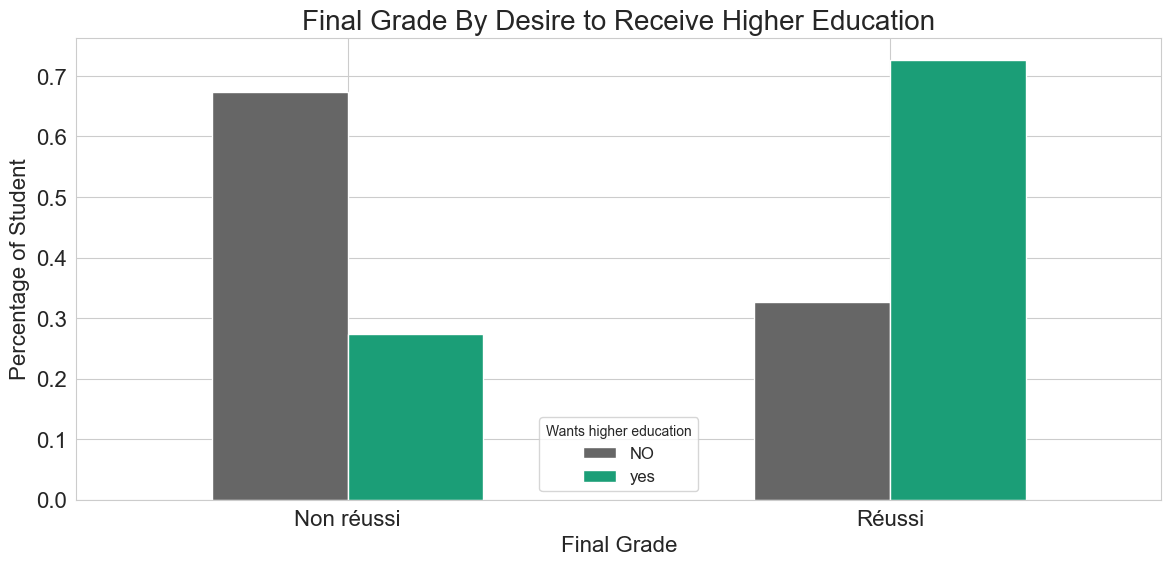

In [46]:
higher_tab = pd.crosstab(index=df_numerical.réussir, columns=df_numerical.Wants_Higher_Education)
higher_perc = higher_tab.apply(perc).reindex(index)
higher_perc.columns=['NO','yes']
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('Final Grade By Desire to Receive Higher Education', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.gca().set_xticklabels(['Non réussi', 'Réussi'], rotation=0)
plt.ylabel('Percentage of Student', fontsize=16)
plt.legend(title='Wants higher education', fontsize=12)

c6: les etudaints qui ont un objectif d'attendre une ecole superieurs ont un taux de reussite elevee 
 <h5 style='color:yellow'>mettre dans tes yeux une ecole de reves pour augmenter ton taux de reussite !!</h5>

#### f) la reussite par apport au age des etudiants 

Text(0, 0.5, 'Percentage of Student')

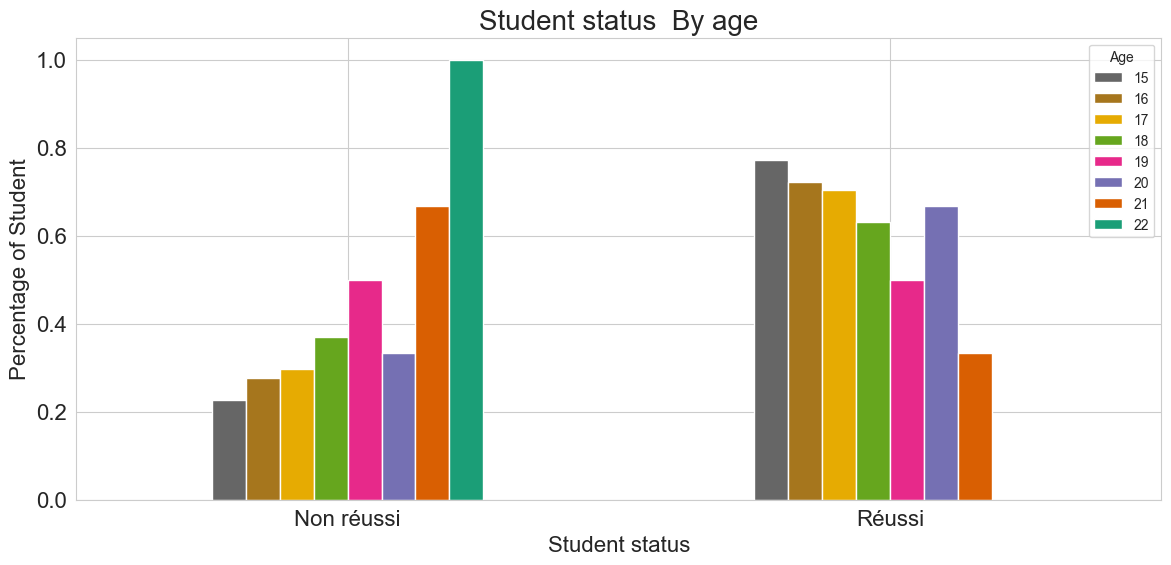

In [47]:
#impact of age
higher_tab = pd.crosstab(index=df_numerical.réussir, columns=df_numerical.Age)
higher_perc = higher_tab.apply(perc).reindex(index)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('Student status  By age', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.gca().set_xticklabels(['Non réussi', 'Réussi'], rotation=0)
plt.ylabel('Percentage of Student', fontsize=16)

l'age joue un role important dans l'augmentation de taux de reussite , dans le graphe les etudiants ayant un age eleve par apport aux autre etudaints ils ont pas reussie leur exams en revanche ceux qui ont un age plus petit ont reussie , en bref c'est mieu d'inscrire vos etudiants plus tot dans les ecoles primaires

#### G) Student status by failures:

Text(0, 0.5, 'Percentage of Student')

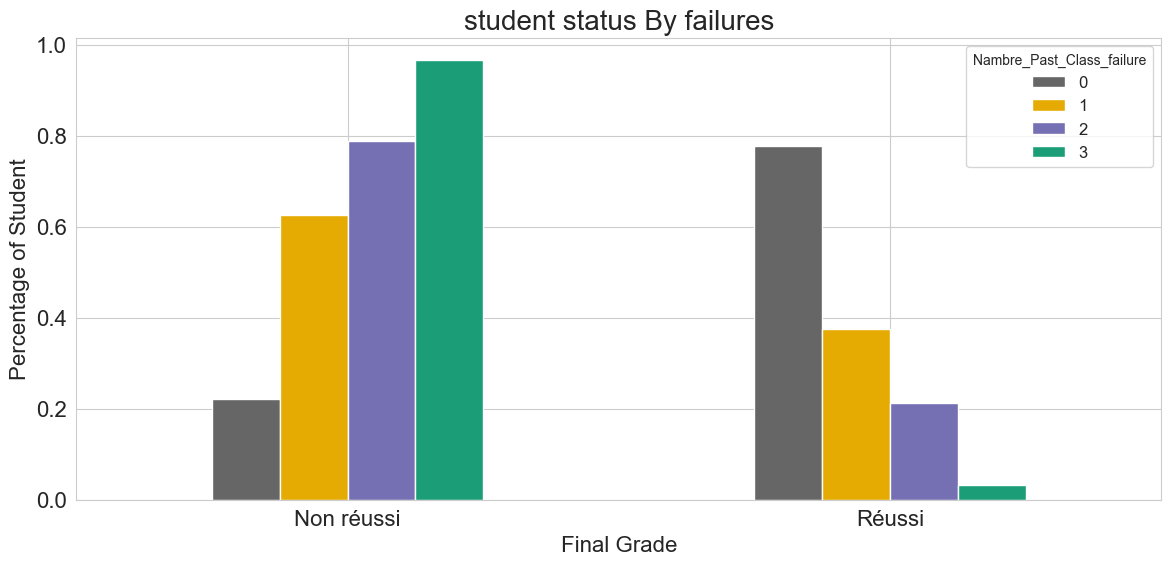

In [48]:
fail_tab = pd.crosstab(index=df_numerical.réussir, columns=df_numerical.Past_Class_Failures)
fail_perc = fail_tab.apply(perc).reindex(index)
fail_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By failures', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.gca().set_xticklabels(['Non réussi', 'Réussi'], rotation=0)
plt.legend(title='Nambre_Past_Class_failure', fontsize=12)
plt.ylabel('Percentage of Student', fontsize=16)

c7 : la plupart des etudiant qui non pas reussie l'examen ils ont deja echoue dans quelque class , donc c-mieu de travailler et assurer de reussir tout votre class

#### H) la reussite des etudiants par apport a la zone residentiel (urbain ou rurale)

Text(0.5, 0, 'Student status')

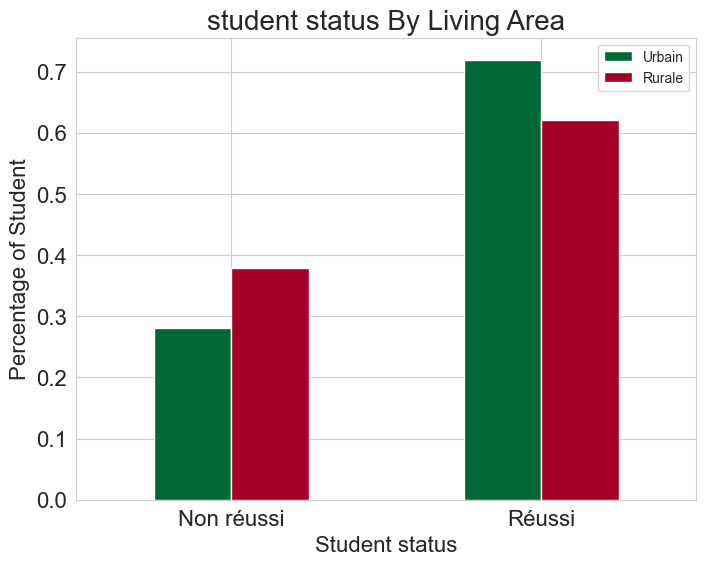

In [49]:
ad_tab1 = pd.crosstab(index=df_numerical.réussir, columns=df_numerical.Home_Address_Type)
ad_perc = ad_tab1.apply(perc).reindex(index)
ad_perc.columns = ['Urbain','Rurale']
ad_perc.plot.bar(colormap="RdYlGn_r", fontsize=16, figsize=(8,6))
plt.title('student status By Living Area', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.gca().set_xticklabels(['Non réussi', 'Réussi'], rotation=0)
plt.xlabel('Student status', fontsize=16)

c8: il n'ya pas une grande differance entre le taux de reussite dans le monde urbaine et rurale 

#### I) la reussite par apport a la consommation d'alcool : 

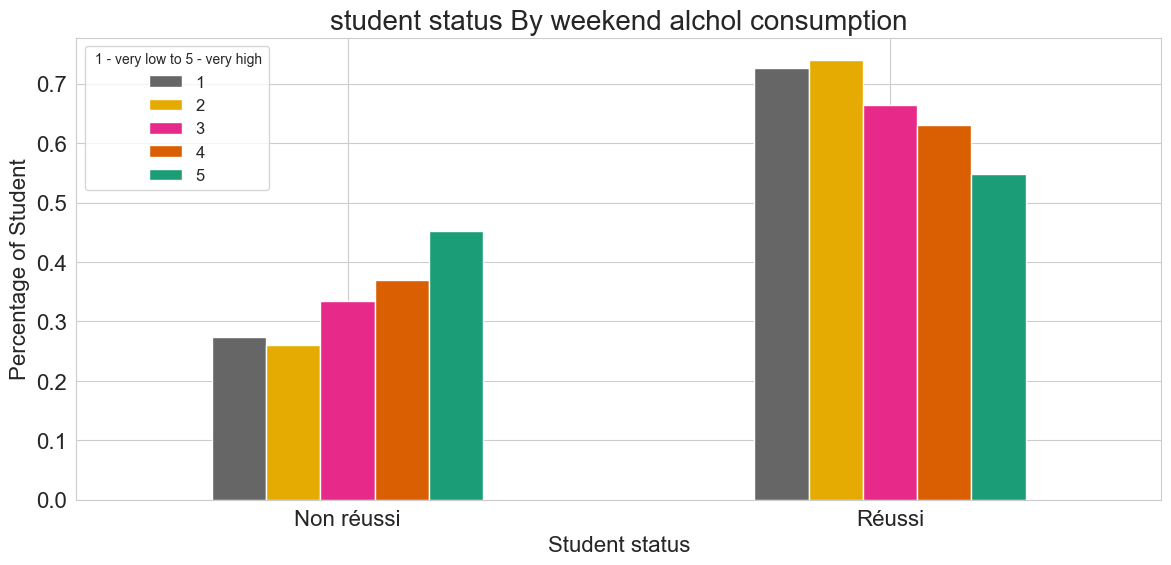

In [50]:
#impact of weekend alcohol consumption in student performance
alc_tab = pd.crosstab(index=df_numerical.réussir, columns=df_numerical.Week_Drugs_Consumption)
alc_perc = alc_tab.apply(perc).reindex(index)
alc_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By weekend alchol consumption', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)
plt.gca().set_xticklabels(['Non réussi', 'Réussi'], rotation=0)
plt.legend(title = ' 1 - very low to 5 - very high',fontsize=12)

eviter l'acool pour reussir vos examens 

C:\Users\PC\AppData\Local\Temp\ipykernel_21212\2052486246.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good['good_alcohol_usage']=good.Week_Drugs_Consumption
C:\Users\PC\AppData\Local\Temp\ipykernel_21212\2052486246.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poor['poor_alcohol_usage']=poor.Week_Drugs_Consumption
C:\Users\PC\AppData\Local\Temp\ipykernel_21212\2052486246.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seabo

Text(0.5, 0, 'Level of Alcohol Consumption')

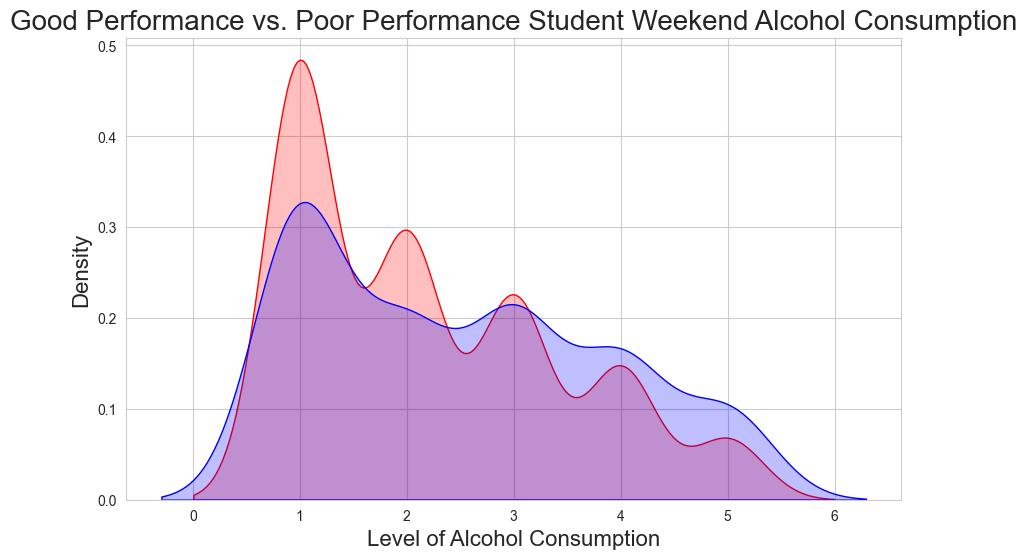

In [51]:
# weekend alcohol consumption
# create good student dataframe
good = df.loc[df_numerical.réussir == 1]
good['good_alcohol_usage']=good.Week_Drugs_Consumption
# create poor student dataframe
poor = df.loc[df_numerical.réussir == 0]
poor['poor_alcohol_usage']=poor.Week_Drugs_Consumption
plt.figure(figsize=(10,6))
p1=sns.kdeplot(good['good_alcohol_usage'], shade=True, color="r") #read for good alcohol usage 
p1=sns.kdeplot(poor['poor_alcohol_usage'], shade=True, color="b") # blue for poor alcohol usage
plt.title('Good Performance vs. Poor Performance Student Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Level of Alcohol Consumption', fontsize=16)

#### J) la reussite par aapport aux activites para scolaire :

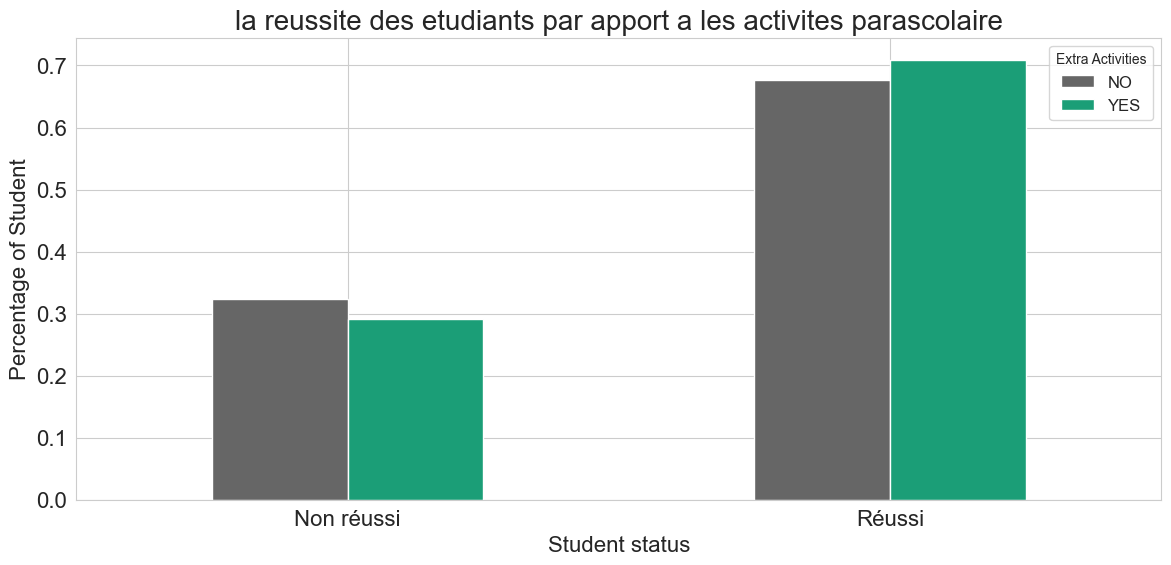

In [52]:
act_tab = pd.crosstab(index=df_numerical.réussir, columns=df_numerical.Extra_Activities)
act_perc = act_tab.apply(perc).reindex(index)
act_perc.columns = ['NO','YES']
act_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('la reussite des etudiants par apport a les activites parascolaire', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)
plt.gca().set_xticklabels(['Non réussi', 'Réussi'], rotation=0)
plt.legend(title = 'Extra Activities',fontsize=12)

les activites parascolaire aide les etudiants a reussir dans leur etude

#### k) la reussite par apport a acccessibilite de l' internet 

Text(0, 0.5, 'Percentage of Student')

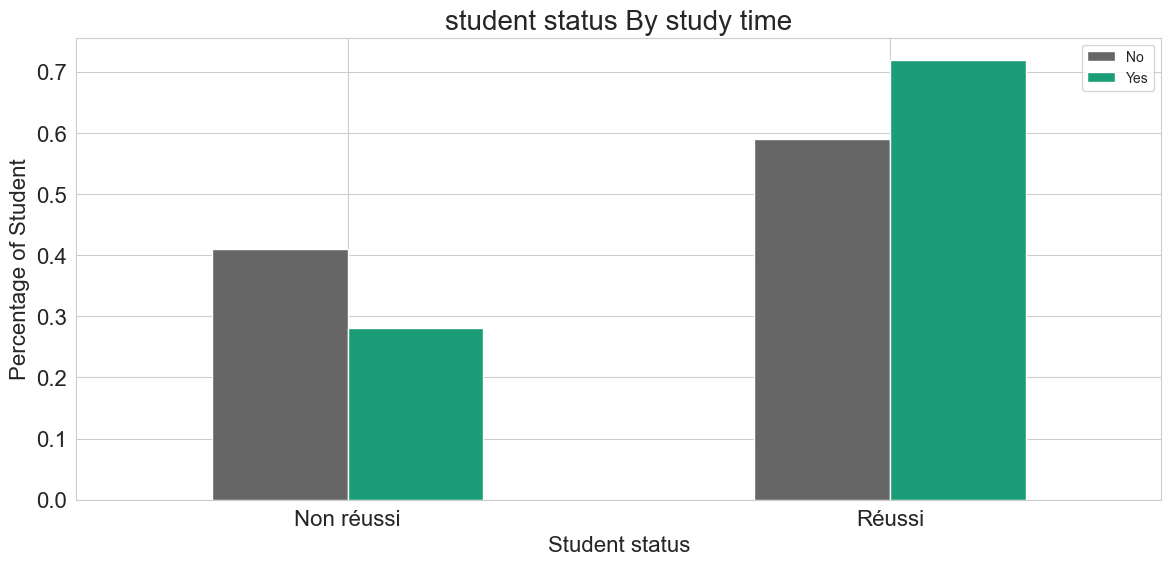

In [53]:
stu_tab = pd.crosstab(index=df_numerical.réussir, columns=df_numerical.Internet_Access)
stu_perc = stu_tab.apply(perc).reindex(index)
stu_perc.columns = ['No','Yes']
stu_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By study time', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.gca().set_xticklabels(['Non réussi', 'Réussi'], rotation=0)
plt.ylabel('Percentage of Student', fontsize=16)

#### L) la reussite par apport a la sante des etudiants 

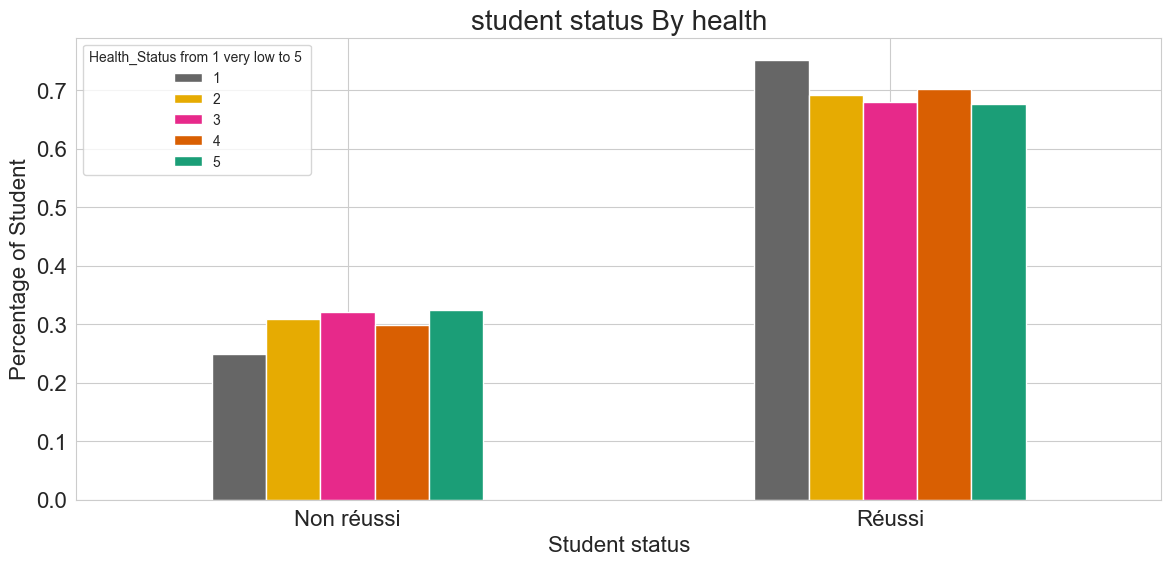

In [54]:
he_tab = pd.crosstab(index=df_numerical.réussir, columns=df_numerical.Health_Status)
he_perc = he_tab.apply(perc).reindex(index)
he_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By health', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)
plt.gca().set_xticklabels(['Non réussi', 'Réussi'], rotation=0)
plt.legend(title='Health_Status from 1 very low to 5 ')

la plupart des etudiants qui echoue dans leur examaens n'ont pas une tres bonne sante 
<h5 style='color:yellow'>good mind in good health </h5>

In [55]:
df.columns

Index(['School', 'Sex', 'Age', 'Home_Address_Type', 'Family_Size',
       'Parents_Cohabitation_Status', 'Mother_Eductaion', 'Father_Education',
       'Mother_Job', 'Father_Job', 'Reason_Choosing_School', 'Guardien',
       'Travel_Time', 'Revision_Time', 'Past_Class_Failures',
       'Extra_Eductional_Support', 'Family_Educational_Support',
       'Extra_Paid_Classes', 'Extra_Activities', 'Attended_Nursery',
       'Wants_Higher_Education', 'Internet_Access', 'Romantic_Relationship',
       'Quality_Family_Relationship', 'Free_Time', 'Go_out',
       'Day_Drugs_Consumption', 'Week_Drugs_Consumption', 'Health_Status',
       'Abscence', 'First_Periode_Grade', 'Seconde_Periode_Grade',
       'Final_Periode_Grade', 'General_Average', 'réussir', 'Final_grade',
       'Binned_Revision_Time'],
      dtype='object')

prepare data to trainning :

In [81]:
dfd = df[['Mother_Eductaion','Revision_Time','Father_Education','Wants_Higher_Education','Age','Past_Class_Failures','Week_Drugs_Consumption','Abscence','Extra_Activities','Internet_Access','Final_grade']]
dfd.head()

,Mother_Eductaion,Revision_Time,Father_Education,Wants_Higher_Education,Age,Past_Class_Failures,Week_Drugs_Consumption,Abscence,Extra_Activities,Internet_Access,Final_grade
0,4,2,4,yes,18,0,1,6,no,no,Low
1,1,2,1,yes,17,0,1,4,no,yes,Low
2,1,2,1,yes,15,3,3,10,no,yes,Low
3,4,3,2,yes,15,0,1,2,yes,yes,High
4,3,2,3,yes,16,0,2,4,no,no,Low


In [ ]:
dfd.to_csv(r'D:\PFE_PROJECT\artifacts\data_pfe.csv')

In [57]:
numeric_features = [feature for feature in dfd.columns if dfd[feature].dtype != 'O']
categorical_features = [feature for feature in dfd.columns if dfd[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 11 numerical features : ['Mother_Eductaion', 'Revision_Time', 'Father_Education', 'Wants_Higher_Education', 'Age', 'Past_Class_Failures', 'Week_Drugs_Consumption', 'Abscence', 'Extra_Activities', 'Internet_Access', 'Final_grade']

We have 0 categorical features : []


In [58]:
x = dfd.drop('Final_grade',axis=1)
y = dfd.Final_grade

In [59]:
# dataset train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2 )# This argument specifies that 30% of the data will be allocated to the testing set (the remaining 70% goes to the training set)

standarisation des donnees (features scaling): 

In [60]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [61]:
len(list(x_train))

835

In [62]:
x_train

array([[-0.55832185,  0.03006037, -0.38299442, ..., -0.06507838,
        -0.97984381, -1.97781817],
       [-0.55832185, -1.16519702,  0.52552927, ..., -0.42024471,
        -0.97984381,  0.50560765],
       [-1.46006022,  0.03006037, -2.2000418 , ..., -0.42024471,
         1.02057082,  0.50560765],
       ...,
       [ 0.34341653,  1.22531775,  0.52552927, ...,  1.0004206 ,
        -0.97984381,  0.50560765],
       [ 1.24515491,  1.22531775, -0.38299442, ..., -0.42024471,
         1.02057082,  0.50560765],
       [ 1.24515491,  0.03006037,  0.52552927, ..., -0.06507838,
         1.02057082,  0.50560765]])

Dscision tree Classifier 

In [63]:
# find the optimal # of minimum samples leaf
msl=[]
for i in range(1,11):
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    t= tree.fit(x_train, y_train)
    ts=t.score(x_test, y_test)
    msl.append(ts)
msl = pd.Series(msl)
msl.where(msl==msl.max()).dropna()

8    0.569378
dtype: float64

Text(0, 0.5, 'accuracy')

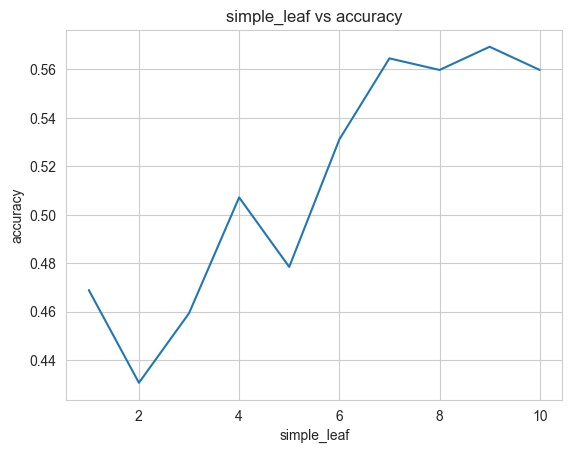

In [64]:

sns.lineplot(x=range(1,11),y=msl)
plt.title("simple_leaf vs accuracy")
plt.xlabel("simple_leaf")
plt.ylabel("accuracy")

In [65]:
tree = DecisionTreeClassifier(min_samples_leaf=7)
t= tree.fit(x_train, y_train)
print("Decisioin Tree Model Score" , ":" , t.score(x_train, y_train) , "," , 
      "Cross Validation Score" ,":" , t.score(x_test, y_test))

Decisioin Tree Model Score : 0.7101796407185629 , Cross Validation Score : 0.5645933014354066


In [66]:
#predire les classes en utilisant les donnees de test:
# Prédire les classes
y_pred = t.predict(x_test)

# Créer une DataFrame
df_R_P = pd.DataFrame({'Classe réelle': y_test, 'Classe prédite': y_pred})

# Afficher la DataFrame
df_R_P.head(30)

,Classe réelle,Classe prédite
197,1,2
228,1,1
126,1,2
187,2,1
117,1,1
454,0,0
298,1,1
173,0,0
55,0,1
311,1,1


Random Forest Classification

In [67]:
# find a good # of min_samples_leaf
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,11):
    forest = RandomForestClassifier()
    f = forest.fit(x_train, y_train)
    fs = f.score(x_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

8    0.602871
dtype: float64

Text(0, 0.5, 'accuracy')

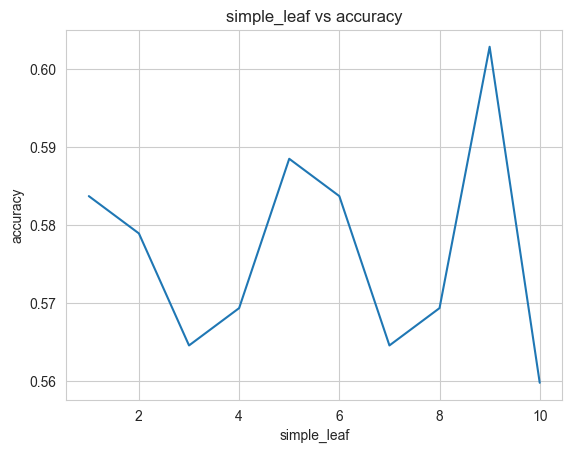

In [68]:
sns.lineplot(x=range(1,11),y=ne)
plt.title("simple_leaf vs accuracy")
plt.xlabel("simple_leaf")
plt.ylabel("accuracy")

In [69]:
# final model
forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=1)
f = forest.fit(x_train, y_train)
print("Raondom Forest Model Score" , ":" , f.score(x_train, y_train) , "," ,
      "Cross Validation Score" ,":" , f.score(x_test, y_test))

Raondom Forest Model Score : 0.9640718562874252 , Cross Validation Score : 0.5789473684210527


Support Vector Classification

In [70]:
from sklearn.svm import SVC
svc = SVC()
s= svc.fit(x_train, y_train)
print("SVC Model Score" , ":" , s.score(x_train, y_train) , "," ,
      "Cross Validation Score" ,":" , s.score(x_test, y_test))

SVC Model Score : 0.6754491017964072 , Cross Validation Score : 0.5885167464114832


In [71]:
# Prédire les classes
y_pred = f.predict(x_test)

# Créer une DataFrame
df_R_P = pd.DataFrame({'Classe réelle': y_test, 'Classe prédite': y_pred})

# Afficher la DataFrame
df_R_P.head(50)

,Classe réelle,Classe prédite
197,1,0
228,1,1
126,1,1
187,2,1
117,1,1
454,0,0
298,1,1
173,0,0
55,0,0
311,1,1


Logistic Regression

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
x_train = scaling.fit_transform(x_train)
x_test = scaling.transform(x_test)

In [73]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg',fit_intercept=True)

In [74]:
# find optimal # of features to use in the model

from sklearn.feature_selection import SelectKBest, chi2

ks=[]
for i in range(1,11):
    sk = SelectKBest(chi2, k=i)
    x_new = sk.fit_transform(x_train,y_train)
    x_new_test=sk.fit_transform(x_test,y_test)
    l = lr.fit(x_new, y_train)
    ll = l.score(x_new_test, y_test)
    ks.append(ll)  
    
ks = pd.Series(ks)
ks = ks.reindex(list(range(1,62)))
ks

1     0.483254
2     0.421053
3     0.377990
4     0.277512
5     0.483254
        ...   
57         NaN
58         NaN
59         NaN
60         NaN
61         NaN
Length: 61, dtype: float64

Text(0, 0.5, 'Prediction Accuracy')

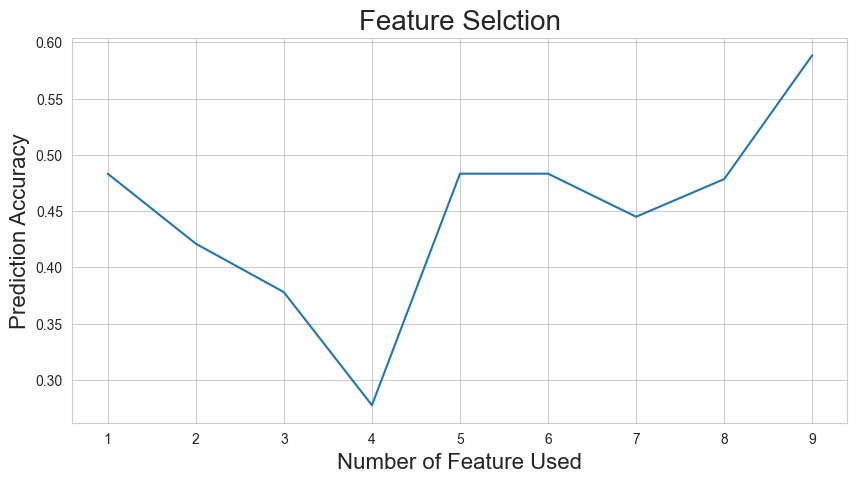

In [75]:
plt.figure(figsize=(10,5))
ks.plot.line()
plt.title('Feature Selction', fontsize=20)
plt.xlabel('Number of Feature Used', fontsize=16)
plt.ylabel('Prediction Accuracy', fontsize=16)

In [76]:
ks.where(ks==ks.max()).dropna()

9    0.588517
dtype: float64

In [77]:
# final model
sk = SelectKBest(chi2, k=9)
x_new = sk.fit_transform(x_train,y_train)
x_new_test=sk.fit_transform(x_test,y_test)
lr = lr.fit(x_new, y_train)
print("Logistic Regression Model Score" , ":" , lr.score(x_new, y_train) , "," ,
      "Cross Validation Score" ,":" , lr.score(x_new_test, y_test))

Logistic Regression Model Score : 0.6359281437125749 , Cross Validation Score : 0.4784688995215311


Ada Boost Classification

In [78]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=2)
af = ada.fit(x_train, y_train)
print("Ada Boost Model Score" , ":" , af.score(x_train, y_train) , "," ,
      "Cross Validation Score" ,":" , af.score(x_test, y_test))

Ada Boost Model Score : 0.629940119760479 , Cross Validation Score : 0.6076555023923444


Stochastic Gradient Descent Classification

In [79]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sf = sgd.fit(x_train, y_train)
print("Stochastic Gradient Descent Model Score" , ":" , sf.score(x_train, y_train) , "," ,
      "Cross Validation Score" ,":" , sf.score(x_test, y_test))

Stochastic Gradient Descent Model Score : 0.629940119760479 , Cross Validation Score : 0.5933014354066986


Model Selection

svc is the winner 